In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
data = pd.read_csv('tips.csv')
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# Random Sampling

In [34]:
simple_random_sample = data.sample(n=50, replace=False, random_state=1)
simple_random_sample.head()

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
243,18.78,3.00,Female,No,Thur,Dinner,2
206,26.59,3.41,Male,Yes,Sat,Dinner,3
122,14.26,2.50,Male,No,Thur,Lunch,2
89,21.16,3.00,Male,No,Thur,Lunch,2


In [4]:
len(simple_random_sample)

50

# Stratified Sampling

In [32]:
def select_from_strata(strata, size, random_state):
    return strata.sample(size, random_state=random_state)

strata = data.groupby('day', group_keys=False)

stratified_sample = select_from_strata(strata, 4, 1)
stratified_sample

,total_bill,tip,sex,smoker,day,time,size
93,16.32,4.30,Female,Yes,Fri,Dinner,2
223,15.98,3.00,Female,No,Fri,Lunch,3
96,27.28,4.00,Male,Yes,Fri,Dinner,2
100,11.35,2.50,Female,Yes,Fri,Dinner,2
211,25.89,5.16,Male,Yes,Sat,Dinner,4
74,14.73,2.20,Female,No,Sat,Dinner,2
73,25.28,5.00,Female,Yes,Sat,Dinner,2
218,7.74,1.44,Male,Yes,Sat,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2
3,23.68,3.31,Male,No,Sun,Dinner,2


In [6]:
len(stratified_sample)

16

# Data Distribution

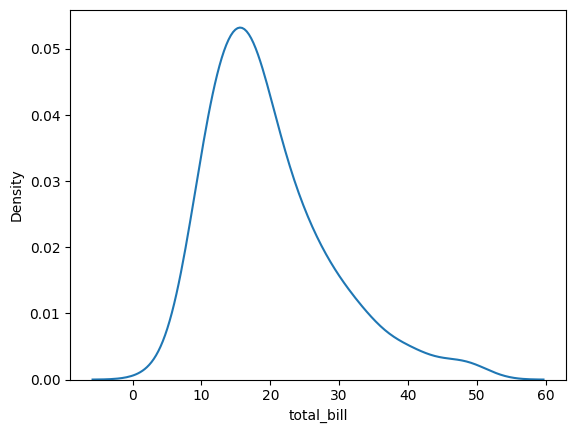

In [7]:
sns.kdeplot(data, x='total_bill')
plt.show()

In [8]:
data['total_bill'].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

# Sampling Distribution

In [9]:
np.random.seed(1)
def bootstrap(iteration, data, sample_size):
    means=[]
    for _ in range(iteration):  
        resample = np.random.choice(data, size=sample_size, replace=True)
        means.append(np.mean(resample))
    return means
    
dist_of_sample_mean = bootstrap(10000, data['total_bill'], 244)
# dist_of_sample_mean

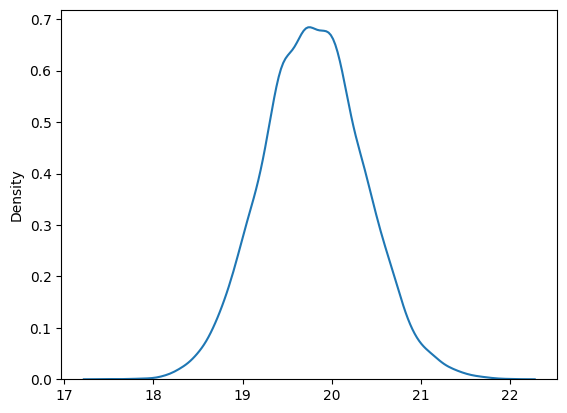

In [10]:
sns.kdeplot(dist_of_sample_mean)
plt.show()

In [11]:
dist_of_sample_mean_df = pd.DataFrame(dist_of_sample_mean)
dist_of_sample_mean_df.describe()

,0
count,10000.000000
mean,19.791683
std,0.565033
min,17.488074
25%,19.408842
50%,19.787541
75%,20.164785
max,22.007008


# Confidence Intervals

In [12]:
def confidence_interval(data, percentage):
    lower = (100 - percentage)/2
    upper = ((100 - percentage)/2) + percentage
    CI = np.percentile(data, lower), np.percentile(data, upper)
    print(f'{percentage}% that the true mean value lies between {CI}')  

confidence_interval(dist_of_sample_mean, 95) 

95% that the true mean value lies between (18.70084323770492, 20.910264344262295)


# Normal Distribution

In [13]:
np.random.seed(1)
normal_dist = np.random.normal(loc=0, scale=1, size=1000000)
# normal_dist

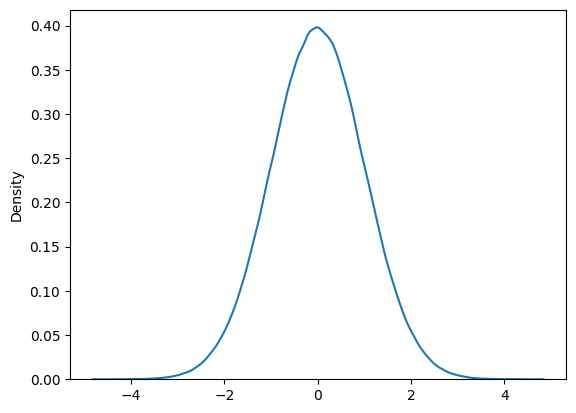

In [14]:
sns.kdeplot(normal_dist)
plt.show()

# QQ-Plot

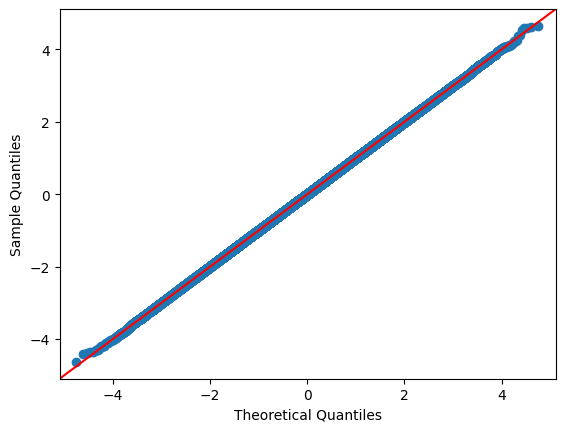

In [15]:
fig = sm.qqplot(normal_dist, line='45')
plt.show()

# Binomial t-Distribution

In [16]:
np.random.seed(1)
binomial_dist = np.random.binomial(n=10, p=0.5, size=1000)
# binomial_dist

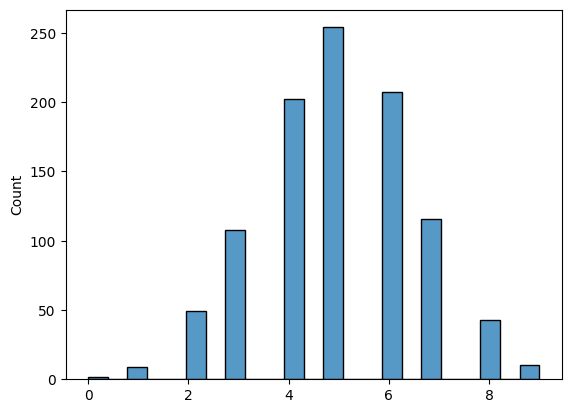

In [17]:
sns.histplot(binomial_dist)
plt.show()

# Chi-square Distribution

In [18]:
np.random.seed(1)
chi_square_dist = np.random.chisquare(df=5, size=1000)
# chi_square_dist

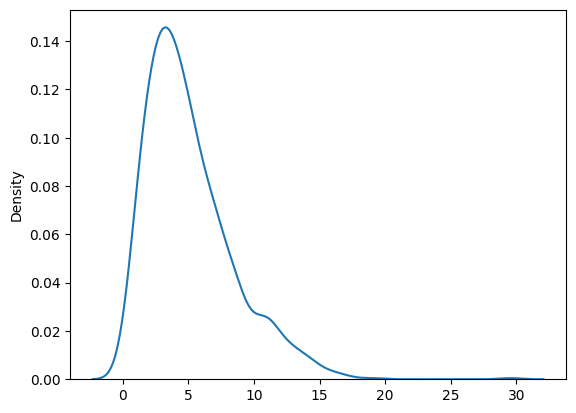

In [19]:
sns.kdeplot(chi_square_dist)
plt.show()

# F-Distribution

In [20]:
np.random.seed(1)
f_dist = np.random.f(dfnum=20, dfden=20, size=1000)
# f_dist

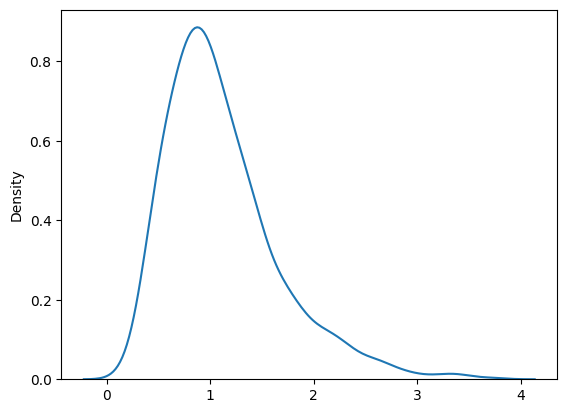

In [21]:
sns.kdeplot(f_dist)
plt.show()

# Poisson Distribution

In [22]:
np.random.seed(1)
poisson_dist = np.random.poisson(lam=2, size=1000)
# poisson_dist

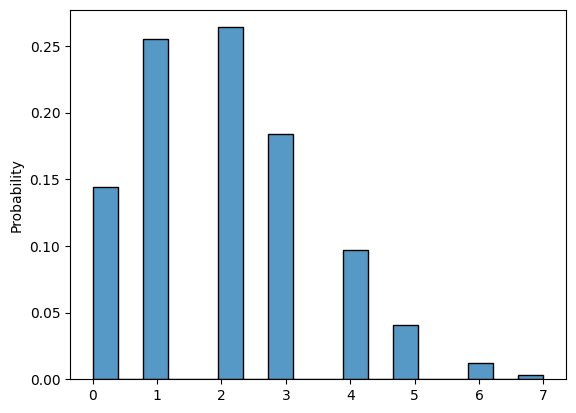

In [23]:
sns.histplot(poisson_dist, stat='probability')
plt.show()

# Exponential Distribution

In [24]:
np.random.seed(1)
exponential_dist = np.random.exponential(scale=2, size=1000)
# exponential_dist

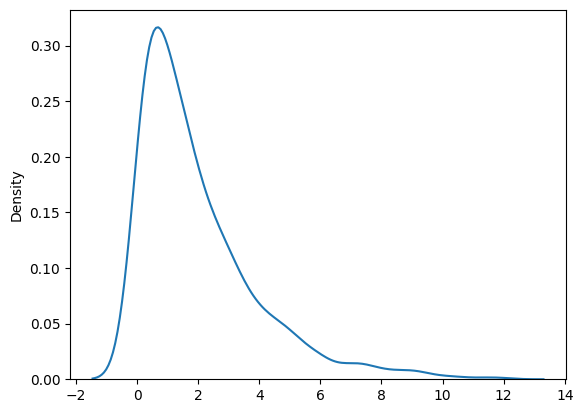

In [25]:
sns.kdeplot(exponential_dist)
plt.show()

# Weibull Distribution

In [26]:
np.random.seed(1)
weibull_dist = np.random.weibull(a=1, size=1000)
# weibull_dist

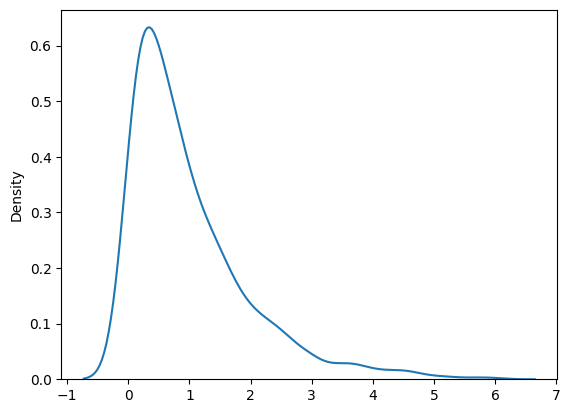

In [27]:
sns.kdeplot(weibull_dist)
plt.show()